# Assignment 4
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# Digit learning challenge
- Use the methods taught in the course, or a good combination of the methods taught in the course to predict all 10 digits of the zipcode data. Only use ziptrain.csv data to build your model, and evaluate the accuracy of your model on ziptest.csv 

- Your codes must be reproducible. We may run your codes on ziptrain.csv data on our own machine. 

# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


# Import Libraries/Modules/Objects

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
import time
import re
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# Get Data

In [3]:
ziptrain = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\ziptrain.csv")
ziptest = np.loadtxt(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 4\ziptest.csv")

In [4]:
X_train, X_test = ziptrain[:, 1:], ziptest[:, 1:]
y_train, y_test = ziptrain[:, 0], ziptest[:, 0]

In [5]:
y_train = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Review Import

[0 0 0 0 0 0 1 0 0 0]


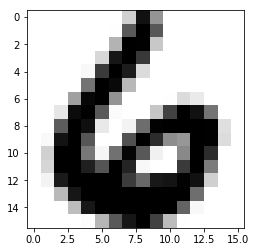

In [6]:
print(y_train[0])
plt.imshow(-X_train[0].reshape(16,16), 'gray')

# Define Grids For Gridsearch

In [8]:
Grid = namedtuple("Grid", ['model', 'param_grid'])

### Using 4 methods: Bagging, Random Forest, Boosting and SVM

##### Define the grid for each method to tune for optimal performance

In [9]:
grids = [
    Grid(BaggingClassifier,
        {'estimator__n_estimators': [200, 400, 600, 800, 1000],
        'estimator__max_samples': [800, 1000, 1200, 1400]}),
    Grid(RandomForestClassifier,
        {'estimator__max_depth': [70, 80, 90, 100, None],
         'estimator__max_features': ['auto', 'sqrt'],
         'estimator__n_estimators': [200, 400, 600, 800, 1000]}),
    Grid(GradientBoostingClassifier,
         {'estimator__max_depth':[3, 4, 5, 6], 
          'estimator__n_estimators':[100,250,500,750,1000]}),
    Grid(SVC, 
    {"estimator__C": [4, 8, 10, 12], 
     "estimator__degree":[3, 4, 5, 6]})
]

### Perform Gridsearch to find hyperparameters that optimize the 4 methods defined above:

In [11]:
def perform_gridsearch(grid):

    print("Starting grid {}".format(str(grid)))
    model = OneVsRestClassifier(grid.model())
    gs = GridSearchCV(model, param_grid=grid.param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    res = {"Model" : grid.model, "Best Parameters" : gs.best_params_, "Accuracy" : gs.best_score_}
    print("\n")
    print("Results from grid:")
    print(res)
    print("\n")
    return gs.best_params_

In [12]:
best_params = []
for grid in grids:
    best_params.append(perform_gridsearch(grid))
print("All Processes Completed Successfully.")

Starting grid Grid(model=<class 'sklearn.ensemble.bagging.BaggingClassifier'>, param_grid={'estimator__n_estimators': [200, 400, 600, 800, 1000], 'estimator__max_samples': [800, 1000, 1200, 1400]})
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 83.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 287.0min finished




Results from grid:
{'Model': <class 'sklearn.ensemble.bagging.BaggingClassifier'>, 'Best Parameters': {'estimator__max_samples': 1400, 'estimator__n_estimators': 600}, 'Accuracy': 0.8244410917569607}


Starting grid Grid(model=<class 'sklearn.ensemble.forest.RandomForestClassifier'>, param_grid={'estimator__max_depth': [70, 80, 90, 100, None], 'estimator__max_features': ['auto', 'sqrt'], 'estimator__n_estimators': [200, 400, 600, 800, 1000]})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 76.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 105.8min finished




Results from grid:
{'Model': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'Best Parameters': {'estimator__max_depth': 100, 'estimator__max_features': 'sqrt', 'estimator__n_estimators': 800}, 'Accuracy': 0.8847894664655054}


Starting grid Grid(model=<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, param_grid={'estimator__max_depth': [3, 4, 5, 6], 'estimator__n_estimators': [100, 250, 500, 750, 1000]})
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 140.5min finished




Results from grid:
{'Model': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'Best Parameters': {'estimator__max_depth': 3, 'estimator__n_estimators': 1000}, 'Accuracy': 0.9273076395556165}


Starting grid Grid(model=<class 'sklearn.svm.classes.SVC'>, param_grid={'estimator__C': [4, 8, 10, 12], 'estimator__degree': [3, 4, 5, 6]})
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.4min finished




Results from grid:
{'Model': <class 'sklearn.svm.classes.SVC'>, 'Best Parameters': {'estimator__C': 12, 'estimator__degree': 3}, 'Accuracy': 0.9587162254834728}


All Processes Completed Successfully.


### Clean the best parameters dictionary keys:

In [13]:
def remove_estimator(d):
    for i in d.keys():
        d[re.sub('estimator__', '', i)] = d.pop(i)
    return d

In [14]:
for i in range(0, len(best_params)):
    best_params[i] = remove_estimator(best_params[i])

### Define method set with best parameters

In [15]:
models =[
    OneVsRestClassifier(BaggingClassifier(**best_params[0])),
    OneVsRestClassifier(RandomForestClassifier(**best_params[1])),
    OneVsRestClassifier(GradientBoostingClassifier(**best_params[2])),
    OneVsRestClassifier(SVC(**best_params[3]))
]

### Fit tuned algorithms and compare results for each method

##### 30 folds so the mean score is statistically significant

In [16]:
mean_accuracy = []
std_accuracy = []
for model in models:
    accuracy = []
    kf = KFold(n_splits=30, shuffle=True)
    print("Starting 30 K-Fold Evaluation for Model {}:".format(model))
    i=0
    for train_i, test_i, in kf.split(X_train):
        i+=1
        print(i,"/",30)
        alg = model
        alg = alg.fit(X_train[train_i], y_train[train_i])
        y_true = y_train[test_i]
        y_pred = alg.predict(X_train[test_i])
        accuracy.append(accuracy_score(y_true, y_pred))
    mean_accuracy.append(np.mean(accuracy))
    std_accuracy.append(np.std(accuracy))
    print("Mean Accuracy:", mean_accuracy[-1])
    print("Standard Deviation of Accuracy:", std_accuracy[-1])
    print("\n")

Starting 30 K-Fold Evaluation for Model OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1400,
         n_estimators=600, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          n_jobs=1):
1 / 30
2 / 30
3 / 30
4 / 30
5 / 30
6 / 30
7 / 30
8 / 30
9 / 30
10 / 30
11 / 30
12 / 30
13 / 30
14 / 30
15 / 30
16 / 30
17 / 30
18 / 30
19 / 30
20 / 30
21 / 30
22 / 30
23 / 30
24 / 30
25 / 30
26 / 30
27 / 30
28 / 30
29 / 30
30 / 30
Mean Accuracy: 0.8285541613258673
Standard Deviation of Accuracy: 0.02275865050772631


Starting 30 K-Fold Evaluation for Model OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weig

# Best Model:

In [29]:
print("The algorithm that performed best on the validation sets is:\n\n{}\n\n".format(models[-1]) +
"As it received an accuracy score of {} with a standard deviation of {}".format(mean_accuracy[-1], std_accuracy[-1]))

The algorithm that performed best on the validation sets is:

OneVsRestClassifier(estimator=SVC(C=12, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1)

As it received an accuracy score of 0.9639282421462142 with a standard deviation of 0.009058197082089964


# Performance on the Test Set:

In [16]:
alg = OneVsRestClassifier(SVC(C=12, gamma='auto', kernel='rbf', degree=3))
alg = alg.fit(X_train, y_train)
y_true = y_test
y_pred = alg.predict(X_test)
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Accuracy: {}".format(acc))
print("Confusion Matrix: \n{}".format(cm))

Accuracy: 0.9212755356253114
Confusion Matrix: 
[[356   0   2   0   1   0   0   0   0   0]
 [  2 255   0   0   4   0   3   0   0   0]
 [ 15   0 178   1   1   0   0   1   2   0]
 [ 15   0   1 145   0   3   0   0   1   1]
 [  9   1   2   0 184   1   1   0   0   2]
 [ 11   0   0   2   1 145   0   0   1   0]
 [  4   1   3   0   3   1 158   0   0   0]
 [  8   0   1   1   3   0   0 133   1   0]
 [ 17   0   0   2   0   1   0   0 146   0]
 [  7   0   0   0   2   0   0   0   0 168]]


# Process Justification

I began this process by remembering that in Assignment 3 we had investigated PCA as a possible route for reducing dimensions to improve performance of the classifiers we used. Noticing that in the case of trying to classify all digits PCA had limited benefits – I decided to preserve time and not utilize any PCA in order to spend more time performing grid searches using high-performing classifiers. The classifiers I attempted to leverage in this assignment were 3 ensemble methods (bagging, boosting, and random forest) and a support vector classifier. From the intuition I’ve gathered from class and experience it seems that without venturing into the realm of neural networks these 4 methods tend to have the highest-performing results. Now that I had these 4 algorithms defined I need to tweak them to find the hyper-parameters that yield the best results. I started this process by performing a general gridsearch on each method to try to find the best hyperparameters to maximize accuracy. I used a 5-fold cross-validation for this process. While 5-fold cross-validation is not ideal for yielding reliable scoring for each candidate (5 is a small sample size) I had decided to start with this small number because initially I had tried a 30-fold cross validation and noticed the training time for these large grids would last weeks to yield results for each algorithm. As a compromise I decided to start with 5-fold for the general hyper-parameter gridsearch to yield the best hyperparameters for each algorithm – then enter another round of gridsearches (with smaller grids) and use 30-fold cross-validation to report the final results. The idea behind the 2x gridsearch method is the first gridsearch quickly gives you an idea of where you should be investigating ideal hyperparameters – then when you have “trimmed the fat” on the grid use 30-fold cross-validation to compare each algorithm to each other. 

To perform this gridsearch I needed to binarize the labels of the output and apply a one-vs-rest classifier approach to handle all outputs of the classifier. One-vs-rest classifier means one classifier is fit per-class and for each classifier the class is fitted against all the other classes. With each of the 4 selected algorithms wrapped in this one-vs-rest classifier I was able to perform a gridsearch that optimized accuracy on the results of each class in each algorithm. 

# Results

The predictive results after evaluating on the test set were lower than expected. With an accuracy ov 96% and a low standard deviation over a 30-fold cross-validation would lead me to believe that I should anticipate a higher test-set accuracy than 92%. As a next-step to this project I would continue to fine-tune the SVC algorithm to yield better results (perhaps investigate different kernels).